In [124]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [125]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.columns.values) # 사용할 컬럼명 출력
#['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked']

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Embarked']


In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [127]:
print(train_df.isnull().sum()) # 결측치

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [128]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
import matplotlib as plt
import seaborn as sns

In [130]:
def bar_chart(feature):
   survived = train_df[train_df['Survived'] == 1][feature].value_counts()
   dead = train_df[train_df['Survived'] == 0][feature].value_counts()
   df = pd.DataFrame([survived,dead])
   df.index = ['Survived', 'Dead']
   df.plot(kind='bar', stacked=True, figsize=(5, 2.5))
   

In [131]:
# bar_chart('Sex')
# bar_chart('Pclass')
# bar_chart('SibSp')
# bar_chart('Parch')
# bar_chart('Embarked')


In [132]:
print(train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)) 
# 티켓클래스와 생존률의 비교

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [133]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


데이터 전처리

In [134]:
train_test_data_li = [train_df, test_df] # train, test 데이터 합치기

for dataset in train_test_data_li:
   dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [135]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [136]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

이름의 칭호 매핑 후, 이름 제거, 칭호로 대체

In [137]:
title_mapping = {
   "Mr" : 0, "Miss" : 1, "Mrs": 2, "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mlle" : 3, "Countess" : 3, "Ms" : 2, "Lady" : 1, "Jonkheer" : 3, "Don" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 0
}

for dataset in train_test_data_li:
   dataset['Title'] = dataset['Title'].map(title_mapping)

In [138]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


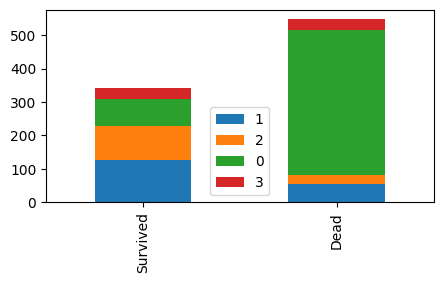

In [139]:
bar_chart('Title')

In [140]:
# 풀필요 feature 삭제
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

성별

In [141]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data_li:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [142]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title            int64
dtype: object

나이 매핑

In [143]:
for dataset in train_test_data_li:
    dataset.loc[dataset['Age'] <=10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <=20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <=30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <=40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <=50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <=60), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <=70), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 70), 'Age'] = 8

In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [145]:

embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data_li:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64


In [146]:
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,1.0,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1,1,1,3.0,1,0,113803,53.1000,0.0,2
4,5,0,3,0,3.0,0,0,373450,8.0500,0.0,0
5,6,0,3,0,NaN,0,0,330877,8.4583,2.0,0
6,7,0,1,0,6.0,0,0,17463,51.8625,0.0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,0.0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,0.0,2
9,10,1,2,1,1.0,1,0,237736,30.0708,1.0,2


Modelling

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    float64
 10  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 76.7+ KB


1. Cross Validation (K-fold)

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

1.1 KNN

In [150]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_df, test_df, cv=k_fold, n_jobs=1, scoring=scoring)

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]